In [0]:
%python pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/40/ad/c22887189c23cc133ae7cbad48c71312f1a962b960fe7f51fd792808a307/wordcloud-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/548.3 kB ? eta -:--:--
   ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/548.3 kB 3.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 450.6/548.3 kB 6.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%python pip install bs4

  Obtaining dependency information for bs4 from https://files.pythonhosted.org/packages/51/bb/bf7aab772a159614954d84aa832c129624ba6c32faa559dfb200a534e50b/bs4-0.0.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for beautifulsoup4 from https://files.pythonhosted.org/packages/b1/fe/e8c672695b37eecc5cbf43e1d0638d88d66ba3a44c4d321c796f4e59167f/beautifulsoup4-4.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for soupsieve>1.2 from https://files.pythonhosted.org/packages/d1/c2/fe97d779f3ef3b15f05c94a2f1e3d21732574ed441687474db9d342a7315/soupsieve-2.6-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/147.9 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from bs4 import BeautifulSoup
import contractions
import unidecode
import requests
import string
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [0]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
file_path = 'output.csv'

with open(file_path, 'r') as file:
    meta_text = file.read()

print(meta_text[:100])

query
dating format
celebrity format
hookup format
blackmailing format
crochet patterns
real book
ba


In [0]:
meta_text = """
The search functionality has improved so much! I can now find what I need without sifting through irrelevant results. Great job!
I love the new content recommendations—they're spot-on and make it easy to discover new things to read.
"The addition of detailed metadata like publication dates and ratings is fantastic. It helps me quickly decide which documents to trust."
"I find the platform really valuable for my academic work. It’s one of my go-to resources now. Keep up the good work!"
"Being able to filter by specific content types has made my searches so much more efficient. Highly recommend this feature to others!"
"The platform is helpful overall, but the search results could still be a bit more relevant to my queries."
I appreciate the recommendations, but they’re not always aligned with what I’m interested in. Maybe they need some tweaking.
The metadata is useful, but sometimes it feels cluttered. Would love a more streamlined way to view this information.
"I’m starting to find more relevant results, but it still takes a few tries to get the exact document I’m looking for."
"It's nice that the platform has so many resources, but I sometimes find myself spending too long trying to get to the right one."
"The search results are often irrelevant to what I’m actually looking for. I still can’t trust it to return quality content."
Finding trustworthy content is difficult. I feel like I have to sift through a lot of low-quality material to get to something useful.
Recommendations don’t seem to fit my needs. It’s like the system doesn’t understand my interests at all.
"The categories are confusing, and the search engine doesn’t seem optimized for key academic terms. This needs improvement."
The search function is still not intuitive. I wish it could better understand the keywords I'm using. It’s frustrating to use sometimes.
"""

In [0]:
## Clean Training Data: (Text Pre-processing)
def text_preprocessor(text):
    ###########################################
    # soup = BeautifulSoup(text, 'html.parser') ## Remove HTML
    # text = soup.get_text(separator=' ') ## Remove HTML
    ###########################################
    text = text.lower() ## Lowercase Characters
    text = contractions.fix(text) ## Expand Contractions ("don't" -> "do not")
    text = re.sub(r'https?:\S*', '', text) ## Remove URLs
    text = re.sub(r'@\S*', '', text) ## Remove Twitter Mentions
    text = re.sub(r'#\S*', '', text) ## Remove Hashtags
    text = re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]', '', text) ## Remove special characters (e.g: %, $, &, etc.)
    text = text.translate(str.maketrans('', '', string.punctuation)) ## Remove Punctuation Characters
    text = re.sub(r'[0-9]+', '', text) ## Remove Numerical Characters
    text = unidecode.unidecode(text) ## Normalized accented characters (ñ -> n)
    ###########################################
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) # no emoji
    ###########################################
    text = word_tokenize(text) ## Tokenize Text    
    stop_words = set(stopwords.words('english')) ## Get Stop Words
    stop_words_exclusion = [] ## Stop Word Exclusion List
    stop_words = [word for word in stop_words if word not in stop_words_exclusion] ## Remove Stop Word Exclusions from Stop Words
    text = [word for word in text if word not in stop_words] ## Remove Stop Words
    ###########################################
    wnl = WordNetLemmatizer() ## Lemmatization: 'studies' -> 'study'; 'studying' -> 'studying'
    text = [wnl.lemmatize(word) for word in text] ## Apply Word Lemmatization
    # ps = PorterStemmer() ## Stemming: ['wait', 'waiting', 'waited', 'waits'] -> 'wait'
    # text = [ps.stem(word) for word in text] ## Apply Word Stemming
    
    return text

In [0]:
# print(meta_text)

In [0]:
preprocessed_training_text = text_preprocessor(meta_text)
# print(preprocessed_training_text)

In [0]:
stop_words = ["'ll", "'tis", "'twas", "'ve", "10", "39", "a", "a's", "able", "ableabout", "about", "above", "abroad", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "adopted", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ago", "ah", "ahead", "ai", "ain't", "aint", "al", "all", "allow", "allows", "almost", "alone", "along", "alongside", "already", "also", "although", "always", "am", "amid", "amidst", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "aq", "ar", "are", "area", "areas", "aren", "aren't", "arent", "arise", "around", "arpa", "as", "aside", "ask", "asked", "asking", "asks", "associated", "at", "au", "auth", "available", "aw", "away", "awfully", "az", "b", "ba", "back", "backed", "backing", "backs", "backward", "backwards", "bb", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "began", "begin", "beginning", "beginnings", "begins", "behind", "being", "beings", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bf", "bg", "bh", "bi", "big", "bill", "billion", "biol", "bj", "bm", "bn", "bo", "both", "bottom", "br", "brief", "briefly", "bs", "bt", "but", "buy", "bv", "bw", "by", "bz", "c", "c'mon", "c's", "ca", "call", "came", "can", "can't", "cannot", "cant", "caption", "case", "cases", "cause", "causes", "cc", "cd", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "ck", "cl", "clear", "clearly", "click", "cm", "cmon", "cn", "co", "co.", "com", "come", "comes", "computer", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "copy", "corresponding", "could", "could've", "couldn", "couldn't", "couldnt", "course", "cr", "cry", "cs", "cu", "currently", "cv", "cx", "cy", "cz", "d", "dare", "daren't", "darent", "date", "de", "dear", "definitely", "describe", "described", "despite", "detail", "did", "didn", "didn't", "didnt", "differ", "different", "differently", "directly", "dj", "dk", "dm", "do", "does", "doesn", "doesn't", "doesnt", "doing", "don", "don't", "done", "dont", "doubtful", "down", "downed", "downing", "downs", "downwards", "due", "during", "dz", "e", "each", "early", "ec", "ed", "edu", "ee", "effect", "eg", "eh", "eight", "eighty", "either", "eleven", "else", "elsewhere", "empty", "end", "ended", "ending", "ends", "enough", "entirely", "er", "es", "especially", "et", "et-al", "etc", "even", "evenly", "ever", "evermore", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "f", "face", "faces", "fact", "facts", "fairly", "far", "farther", "felt", "few", "fewer", "ff", "fi", "fifteen", "fifth", "fifty", "fify", "fill", "find", "finds", "fire", "first", "five", "fix", "fj", "fk", "fm", "fo", "followed", "following", "follows", "for", "forever", "former", "formerly", "forth", "forty", "forward", "found", "four", "fr", "free", "from", "front", "full", "fully", "further", "furthered", "furthering", "furthermore", "furthers", "fx", "g", "ga", "gave", "gb", "gd", "ge", "general", "generally", "get", "gets", "getting", "gf", "gg", "gh", "gi", "give", "given", "gives", "giving", "gl", "gm", "gmt", "gn", "go", "goes", "going", "gone", "good", "goods", "got", "gotten", "gov", "gp", "gq", "gr", "great", "greater", "greatest", "greetings", "group", "grouped", "grouping", "groups", "gs", "gt", "gu", "gw", "gy", "h", "had", "hadn't", "hadnt", "half", "happens", "hardly", "has", "hasn", "hasn't", "hasnt", "have", "haven", "haven't", "havent", "having", "he", "he'd", "he'll", "he's", "hed", "hell", "hello", "help", "hence", "her", "here", "here's", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "herse”", "hes", "hi", "hid", "high", "higher", "highest", "him", "himself", "himse”", "his", "hither", "hk", "hm", "hn", "home", "homepage", "hopefully", "how", "how'd", "how'll", "how's", "howbeit", "however", "hr", "ht", "htm", "html", "http", "hu", "hundred", "i", "i'd", "i'll", "i'm", "i've", "i.e.", "id", "ie", "if", "ignored", "ii", "il", "ill", "im", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "inc.", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "inside", "insofar", "instead", "int", "interest", "interested", "interesting", "interests", "into", "invention", "inward", "io", "iq", "ir", "is", "isn", "isn't", "isnt", "it", "it'd", "it'll", "it's", "itd", "itll", "its", "itself", "itse”", "ive", "j", "je", "jm", "jo", "join", "jp", "just", "k", "ke", "keep", "keeps", "kept", "keys", "kg", "kh", "ki", "kind", "km", "kn", "knew", "know", "known", "knows", "kp", "kr", "kw", "ky", "kz", "l", "la", "large", "largely", "last", "lately", "later", "latest", "latter", "latterly", "lb", "lc", "least", "length", "less", "lest", "let", "let's", "lets", "li", "like", "liked", "likely", "likewise", "line", "little", "lk", "ll", "long", "longer", "longest", "look", "looking", "looks", "low", "lower", "lr", "ls", "lt", "ltd", "lu", "lv", "ly", "m", "ma", "made", "mainly", "make", "makes", "making", "man", "many", "may", "maybe", "mayn't", "maynt", "mc", "md", "me", "mean", "means", "meantime", "meanwhile", "member", "members", "men", "merely", "mg", "mh", "microsoft", "might", "might've", "mightn't", "mightnt", "mil", "mill", "million", "mine", "minus", "miss", "mk", "ml", "mm", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mp", "mq", "mr", "mrs", "ms", "msie", "mt", "mu", "much", "mug", "must", "must've", "mustn't", "mustnt", "mv", "mw", "mx", "my", "myself", "myse”", "mz", "n", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needed", "needing", "needn't", "neednt", "needs", "neither", "net", "netscape", "never", "neverf", "neverless", "nevertheless", "new", "newer", "newest", "next", "nf", "ng", "ni", "nine", "ninety", "nl", "no", "no-one", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "notwithstanding", "novel", "now", "nowhere", "np", "nr", "nu", "null", "number", "numbers", "nz", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "older", "oldest", "om", "omitted", "on", "once", "one", "one's", "ones", "only", "onto", "open", "opened", "opening", "opens", "opposite", "or", "ord", "order", "ordered", "ordering", "orders", "org", "other", "others", "otherwise", "ought", "oughtn't", "oughtnt", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "pa", "page", "pages", "part", "parted", "particular", "particularly", "parting", "parts", "past", "pe", "per", "perhaps", "pf", "pg", "ph", "pk", "pl", "place", "placed", "places", "please", "plus", "pm", "pmid", "pn", "point", "pointed", "pointing", "points", "poorly", "possible", "possibly", "potentially", "pp", "pr", "predominantly", "present", "presented", "presenting", "presents", "presumably", "previously", "primarily", "probably", "problem", "problems", "promptly", "proud", "provided", "provides", "pt", "put", "puts", "pw", "py", "q", "qa", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "reserved", "respectively", "resulted", "resulting", "results", "right", "ring", "ro", "room", "rooms", "round", "ru", "run", "rw", "s", "sa", "said", "same", "saw", "say", "saying", "says", "sb", "sc", "sd", "se", "sec", "second", "secondly", "seconds", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "sees", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "seventy", "several", "sg", "sh", "shall", "shan't", "shant", "she", "she'd", "she'll", "she's", "shed", "shell", "shes", "should", "should've", "shouldn", "shouldn't", "shouldnt", "show", "showed", "showing", "shown", "showns", "shows", "si", "side", "sides", "significant", "significantly", "similar", "similarly", "since", "sincere", "site", "six", "sixty", "sj", "sk", "sl", "slightly", "sm", "small", "smaller", "smallest", "sn", "so", "some", "somebody", "someday", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "sr", "st", "state", "states", "still", "stop", "strongly", "su", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sv", "sy", "system", "sz", "t", "t's", "take", "taken", "taking", "tc", "td", "tell", "ten", "tends", "test", "text", "tf", "tg", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "that's", "that've", "thatll", "thats", "thatve", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "there'd", "there'll", "there're", "there's", "there've", "thereafter", "thereby", "thered", "therefore", "therein", "therell", "thereof", "therere", "theres", "thereto", "thereupon", "thereve", "these", "they", "they'd", "they'll", "they're", "they've", "theyd", "theyll", "theyre", "theyve", "thick", "thin", "thing", "things", "think", "thinks", "third", "thirty", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thought", "thoughts", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "til", "till", "tip", "tis", "tj", "tk", "tm", "tn", "to", "today", "together", "too", "took", "top", "toward", "towards", "tp", "tr", "tried", "tries", "trillion", "truly", "try", "trying", "ts", "tt", "turn", "turned", "turning", "turns", "tv", "tw", "twas", "twelve", "twenty", "twice", "two", "tz", "u", "ua", "ug", "uk", "um", "un", "under", "underneath", "undoing", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "upwards", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "uucp", "uy", "uz", "v", "va", "value", "various", "vc", "ve", "versus", "very", "vg", "vi", "via", "viz", "vn", "vol", "vols", "vs", "vu", "w", "want", "wanted", "wanting", "wants", "was", "wasn", "wasn't", "wasnt", "way", "ways", "we", "we'd", "we'll", "we're", "we've", "web", "webpage", "website", "wed", "welcome", "well", "wells", "went", "were", "weren", "weren't", "werent", "weve", "wf", "what", "what'd", "what'll", "what's", "what've", "whatever", "whatll", "whats", "whatve", "when", "when'd", "when'll", "when's", "whence", "whenever", "where", "where'd", "where'll", "where's", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "whichever", "while", "whilst", "whim", "whither", "who", "who'd", "who'll", "who's", "whod", "whoever", "whole", "wholl", "whom", "whomever", "whos", "whose", "why", "why'd", "why'll", "why's", "widely", "width", "will", "willing", "wish", "with", "within", "without", "won", "won't", "wonder", "wont", "words", "work", "worked", "working", "works", "world", "would", "would've", "wouldn", "wouldn't", "wouldnt", "ws", "www", "x", "y", "ye", "year", "years", "yes", "yet", "you", "you'd", "you'll", "you're", "you've", "youd", "youll", "young", "younger", "youngest", "your", "youre", "yours", "yourself", "yourselves", "youve", "yt", "yu", "z", "za", "zero", "zm", "zr"]

In [0]:
normalized_text = text_preprocessor(meta_text)

normalized_text = [word for word in normalized_text if word not in stop_words]

remove_list = ['scribd','everand','who','what','when','where','why','how','which','is','are','the','key','takeaways','takeaway','from','this','document','book','want','need']
normalized_text = [word for word in normalized_text if word not in remove_list]

normalized_text_df = pd.DataFrame(normalized_text)
##
normalized_text = ' '.join(normalized_text)
# print(normalized_text)

In [0]:
df = normalized_text_df.pivot_table(index = [0], aggfunc ='size')
df = df.sort_values(ascending=False)
df.head(50)

0
search                 6
result                 4
content                4
platform               3
academic               2
feel                   2
understand             2
trust                  2
resource               2
relevant               2
recommendation         2
metadata               2
irrelevant             2
love                   2
engine                 1
exact                  1
query                  1
rating                 1
read                   1
recommend              1
detailed               1
recommendationsthey    1
decide                 1
confusing              1
cluttered              1
return                 1
category               1
sift                   1
sifting                1
specific               1
spending               1
spoton                 1
starting               1
streamlined            1
term                   1
bit                    1
trustworthy            1
tweaking               1
type                   1
aligned                

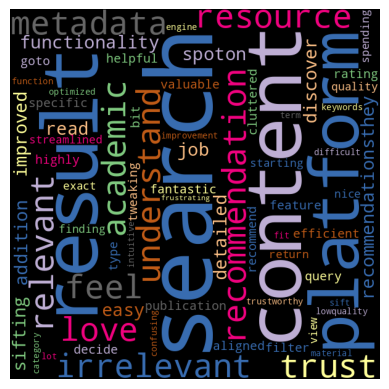

In [0]:
wc = WordCloud().generate(normalized_text)
wc = WordCloud(background_color='black', colormap = 'Accent', width = 600, height = 600).generate(normalized_text)
plt.axis("off")
plt.imshow(wc)